In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

In [2]:
dataset=pd.read_csv('/content/airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.shape

(144, 2)

In [4]:
dataset.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
dataset['Month']=pd.to_datetime(dataset['Month'])
dataset.tail()

,Month,Thousands of Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [7]:
dataset.set_index('Month',inplace=True)
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


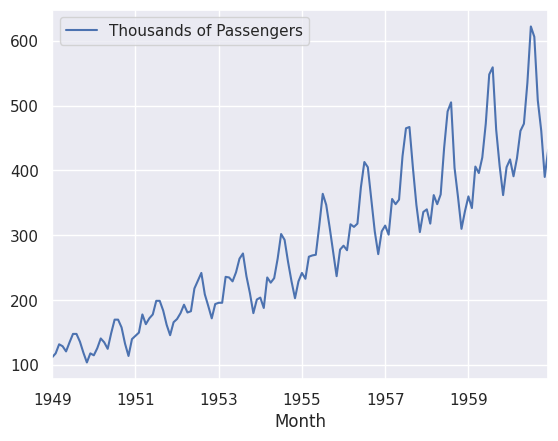

In [8]:
dataset.plot()
plt.show()

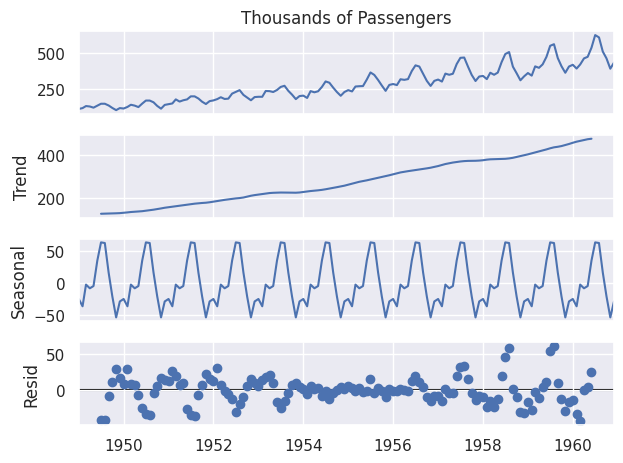

In [9]:
# Decomposition to check components of time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(dataset['Thousands of Passengers'],period=12)
decomposition.plot()
plt.show()

In [10]:
# Check for Auto-Correction (Durbin Watson test)
import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

np.float64(0.0121527966037621)

In [ ]:
# Checking Timeseries is stationary or not
# Approach - Augumented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [ ]:
def adf_test(timeseries):
  print('**************************************Augmented Dickey Fuller Test*************************************')
  result=adfuller(timeseries)
  labels=['ADF Statistics Test','p_value','#Lags','no.of observations']
  for a,b in zip(result,labels):
    print(b+" : "+str(a))
  if result[1]<=0.05:
    print("Strong evidence against null hypothesis and my time series is Stationary")
  else:
    print("Weak evidence against null hypothesis and my time series is 'not Stationary'")

In [ ]:
adf_test(dataset['Thousands of Passengers'])

**************************************Augmented Dickey Fuller Test*************************************
ADF Statistics Test : 0.8153688792060498
p_value : 0.991880243437641
#Lags : 13
no.of observations : 130
Weak evidence against null hypothesis and my time series is 'not Stationary'


In [ ]:
dataset['1st Diff']=dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)
dataset.head()

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
adf_test(dataset['1st Diff'].dropna())

**************************************Augmented Dickey Fuller Test*************************************
ADF Statistics Test : -2.8292668241700047
p_value : 0.05421329028382478
#Lags : 12
no.of observations : 130
Weak evidence against null hypothesis and my time series is 'not Stationary'


In [ ]:
dataset['2nd Diff']=dataset['1st Diff']-dataset['1st Diff'].shift(1)
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff,3rd Diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,-25.0
1949-05-01,121,-8.0,-5.0,12.0
1949-06-01,135,14.0,22.0,27.0
1949-07-01,148,13.0,-1.0,-23.0
1949-08-01,148,0.0,-13.0,-12.0
1949-09-01,136,-12.0,-12.0,1.0


In [ ]:
adf_test(dataset['2nd Diff'].dropna())

**************************************Augmented Dickey Fuller Test*************************************
ADF Statistics Test : -16.384231542468513
p_value : 2.7328918500142026e-29
#Lags : 11
no.of observations : 130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# parameters d=2, p=? , q=?

In [ ]:
# Seasonality
# parameters P=?,D=?,Q=?

In [ ]:
dataset['Seasonality']=dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(12)
dataset.head(15)

,Thousands of Passengers,1st Diff,2nd Diff,3rd Diff,Seasonality
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,-25.0,NaN
1949-05-01,121,-8.0,-5.0,12.0,NaN
1949-06-01,135,14.0,22.0,27.0,NaN
1949-07-01,148,13.0,-1.0,-23.0,NaN
1949-08-01,148,0.0,-13.0,-12.0,NaN
1949-09-01,136,-12.0,-12.0,1.0,NaN


In [ ]:
adf_test(dataset['Seasonality'].dropna())

**************************************Augmented Dickey Fuller Test*************************************
ADF Statistics Test : -3.383020726492481
p_value : 0.011551493085514952
#Lags : 1
no.of observations : 130
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# Trend -  parameters p=4,d=2,q=2

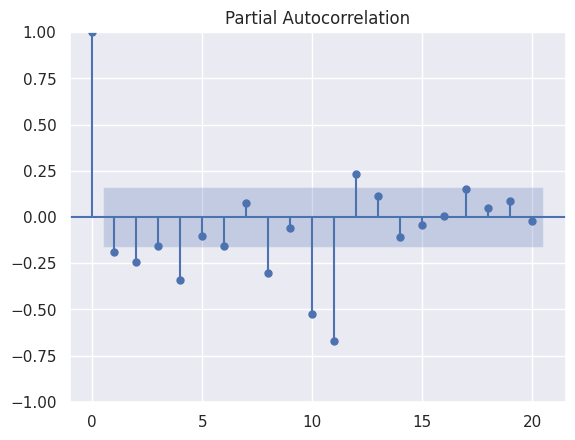

In [ ]:
#To find p/P and q/Q we have to use graphic timeseriesanalysisplot(tsa)
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(dataset['2nd Diff'].dropna(),lags=20)
plt.show()

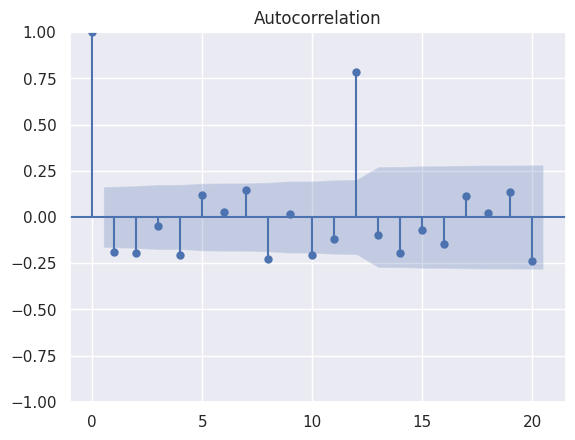

In [ ]:
plot_acf(dataset['2nd Diff'].dropna(),lags=20)
plt.show()

In [ ]:
#Seasonality-  parameters P=2,D=1,Q=5

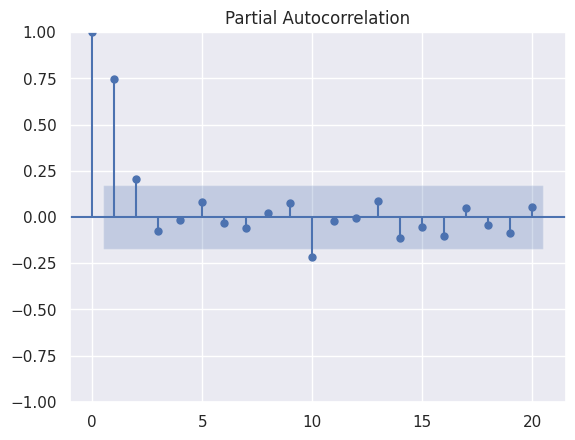

In [ ]:
plot_pacf(dataset['Seasonality'].dropna(),lags=20)
plt.show()

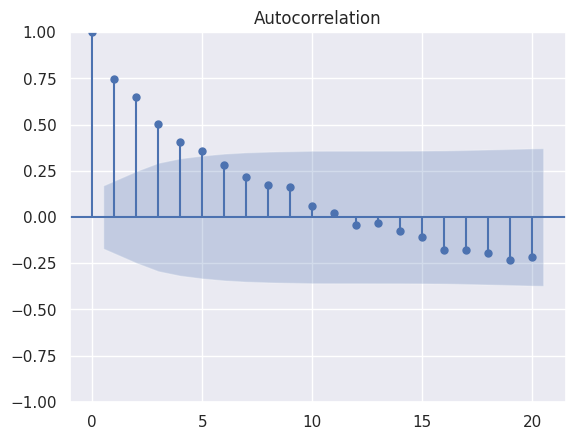

In [ ]:
plot_acf(dataset['Seasonality'].dropna(),lags=20)
plt.show()

In [ ]:
# Seasonality-  parameters P=2,D=1,Q=5
# Trend -  parameters p=4,d=2,q=2

In [17]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,5,12))
result=model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.736
Date:                                          Sun, 13 Apr 2025   AIC                           1021.471
Time:                                                  06:08:13   BIC                           1061.617
Sample:                                              01-01-1949   HQIC                          1037.784
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [ ]:
dataset['forecast']=result.predict(start=130,end=144,dyanamic=True)

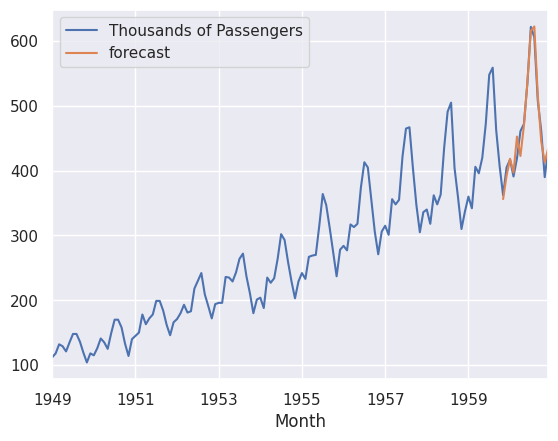

In [ ]:
dataset[['Thousands of Passengers','forecast']].plot()
plt.show()

In [12]:
from pandas.tseries.offsets import DateOffset
future_data=[dataset.index[-1]+DateOffset(months=i) for i in range(0,61)]
future_data

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [13]:
future_df=pd.DataFrame(index=future_data[1:],columns=dataset.columns)
future_df

,Thousands of Passengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [15]:
future_df=pd.concat([dataset,future_df])
future_df.tail(65)

,Thousands of Passengers
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432
...,...
1965-08-01,NaN
1965-09-01,NaN
1965-10-01,NaN
1965-11-01,NaN


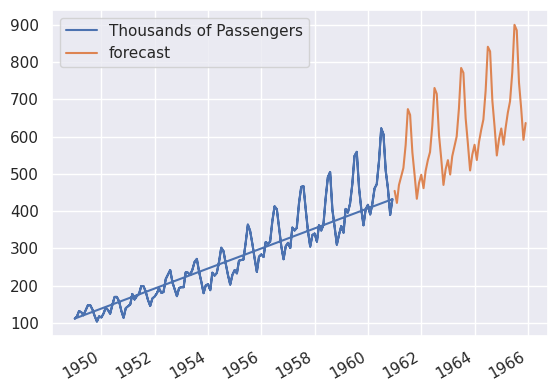

In [19]:
future_df['forecast']=result.predict(start=144,end=205,dynamic=True)
future_df[['Thousands of Passengers','forecast']].plot()
plt.show()

In [20]:
future_df

,Thousands of Passengers,forecast
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1965-08-01,NaN,884.778997
1965-09-01,NaN,744.053442
1965-10-01,NaN,674.644851
1965-11-01,NaN,591.180556


In [22]:
## Another method to find parameter
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model=sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
      result=model.fit()
      print("SARIMAX {}x{} - AIC: {}".format(param,param_seasonal,result.aic))
    except:
      continue

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMAX (0, 0, 0)x(0, 0, 0, 12) - AIC: 2044.4329486427587
SARIMAX (0, 0, 0)x(0, 0, 1, 12) - AIC: 1887.3336957046115
SARIMAX (0, 0, 0)x(0, 1, 0, 12) - AIC: 1315.9211929474204
SARIMAX (0, 0, 0)x(0, 1, 1, 12) - AIC: 1156.2914901508536
SARIMAX (0, 0, 0)x(1, 0, 0, 12) - AIC: 1118.6259190717344
SARIMAX (0, 0, 0)x(1, 0, 1, 12) - AIC: 1107.2562043241846
SARIMAX (0, 0, 0)x(1, 1, 0, 12) - AIC: 1109.2437994445113


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (0, 0, 0)x(1, 1, 1, 12) - AIC: 1033.6172166729725
SARIMAX (0, 0, 1)x(0, 0, 0, 12) - AIC: 1846.0789377571616


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1)x(0, 0, 1, 12) - AIC: 1567.9916312317516
SARIMAX (0, 0, 1)x(0, 1, 0, 12) - AIC: 1196.998361439986
SARIMAX (0, 0, 1)x(0, 1, 1, 12) - AIC: 1072.1382984044296


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (0, 0, 1)x(1, 0, 0, 12) - AIC: 1071.0026809496385


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1)x(1, 0, 1, 12) - AIC: 1049.5801412336764
SARIMAX (0, 0, 1)x(1, 1, 0, 12) - AIC: 1059.5112223290448


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1)x(1, 1, 1, 12) - AIC: 985.3346478031496
SARIMAX (0, 1, 0)x(0, 0, 0, 12) - AIC: 1405.0006612949667
SARIMAX (0, 1, 0)x(0, 0, 1, 12) - AIC: 1194.7130010979654
SARIMAX (0, 1, 0)x(0, 1, 0, 12) - AIC: 1024.4816429833895
SARIMAX (0, 1, 0)x(0, 1, 1, 12) - AIC: 937.7995265380566
SARIMAX (0, 1, 0)x(1, 0, 0, 12) - AIC: 1031.4838983661916


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (0, 1, 0)x(1, 0, 1, 12) - AIC: 1015.000034757991
SARIMAX (0, 1, 0)x(1, 1, 0, 12) - AIC: 944.4876301158429
SARIMAX (0, 1, 0)x(1, 1, 1, 12) - AIC: 939.7984372654341
SARIMAX (0, 1, 1)x(0, 0, 0, 12) - AIC: 1379.4417180072915


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (0, 1, 1)x(0, 0, 1, 12) - AIC: 1181.6309458759258
SARIMAX (0, 1, 1)x(0, 1, 0, 12) - AIC: 1006.7919047398458
SARIMAX (0, 1, 1)x(0, 1, 1, 12) - AIC: 920.6308317604708


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (0, 1, 1)x(1, 0, 0, 12) - AIC: 1014.2239031825333
SARIMAX (0, 1, 1)x(1, 0, 1, 12) - AIC: 985.136233555086


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 1)x(1, 1, 0, 12) - AIC: 934.797542574919
SARIMAX (0, 1, 1)x(1, 1, 1, 12) - AIC: 920.3192974989005
SARIMAX (1, 0, 0)x(0, 0, 0, 12) - AIC: 1415.9068815931885


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMAX (1, 0, 0)x(0, 0, 1, 12) - AIC: 1205.390778617259
SARIMAX (1, 0, 0)x(0, 1, 0, 12) - AIC: 1029.9773091700697
SARIMAX (1, 0, 0)x(0, 1, 1, 12) - AIC: 944.3854921533126


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (1, 0, 0)x(1, 0, 0, 12) - AIC: 1017.3155493518586
SARIMAX (1, 0, 0)x(1, 0, 1, 12) - AIC: 1007.0272559234245


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0)x(1, 1, 0, 12) - AIC: 944.0441660827272


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0)x(1, 1, 1, 12) - AIC: 945.4400866890379
SARIMAX (1, 0, 1)x(0, 0, 0, 12) - AIC: 1390.4515018414943
SARIMAX (1, 0, 1)x(0, 0, 1, 12) - AIC: 1192.2949631619485
SARIMAX (1, 0, 1)x(0, 1, 0, 12) - AIC: 1014.2547824623741


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (1, 0, 1)x(0, 1, 1, 12) - AIC: 929.432970789218
SARIMAX (1, 0, 1)x(1, 0, 0, 12) - AIC: 1009.5891017296451


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1)x(1, 0, 1, 12) - AIC: 989.1764736498087
SARIMAX (1, 0, 1)x(1, 1, 0, 12) - AIC: 935.8163348218233


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1)x(1, 1, 1, 12) - AIC: 935.9152860556453
SARIMAX (1, 1, 0)x(0, 0, 0, 12) - AIC: 1392.9437938537153
SARIMAX (1, 1, 0)x(0, 0, 1, 12) - AIC: 1190.5342929076155
SARIMAX (1, 1, 0)x(0, 1, 0, 12) - AIC: 1013.3680449838143


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (1, 1, 0)x(0, 1, 1, 12) - AIC: 928.131283730555
SARIMAX (1, 1, 0)x(1, 0, 0, 12) - AIC: 1007.6496486406907


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 0)x(1, 0, 1, 12) - AIC: 995.4636249453689
SARIMAX (1, 1, 0)x(1, 1, 0, 12) - AIC: 927.5904374710257


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 0)x(1, 1, 1, 12) - AIC: 928.141862018545
SARIMAX (1, 1, 1)x(0, 0, 0, 12) - AIC: 1377.2926858930794


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1)x(0, 0, 1, 12) - AIC: 1185.3340359693725
SARIMAX (1, 1, 1)x(0, 1, 0, 12) - AIC: 1008.5528813487201
SARIMAX (1, 1, 1)x(0, 1, 1, 12) - AIC: 922.4148960116128


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMAX (1, 1, 1)x(1, 0, 0, 12) - AIC: 1009.1896100685749


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1)x(1, 0, 1, 12) - AIC: 987.1339264663077
SARIMAX (1, 1, 1)x(1, 1, 0, 12) - AIC: 929.5756208330627


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1)x(1, 1, 1, 12) - AIC: 922.205377435144


In [ ]:
#SARIMAX (0, 1, 1)x(1, 1, 1, 12) - AIC: 920.3192974989005

In [24]:
#Final model
model=sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(0, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
result=model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Sun, 13 Apr 2025   AIC                            920.319
Time:                                    07:08:07   BIC                            931.368
Sample:                                01-01-1949   HQIC                           924.805
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
# Fully Automation Method
import pmdarima
from pmdarima import auto_arima
model=auto_arima(y=dataset['Thousands of Passengers'],trace=True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject